Text(0.5, 1.0, 'threshold')

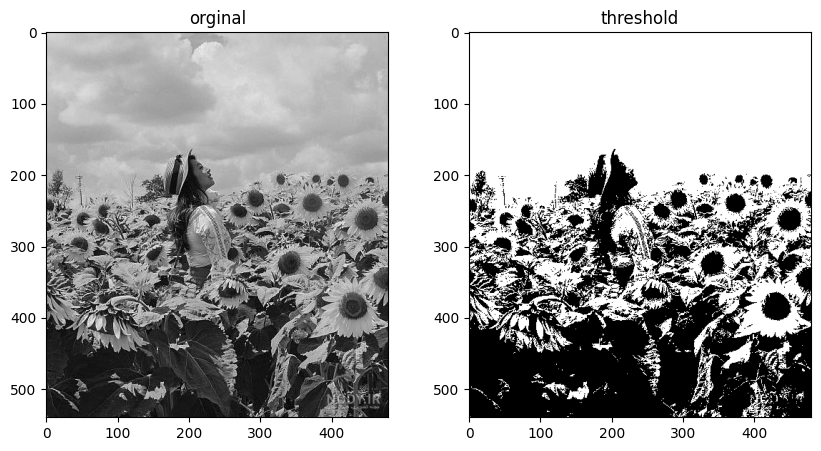

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'D:/test.computer_vision/l2/img/sun2.jpg', 0)

new_img = np.copy(img)
new_img[new_img < 127] = 0
new_img[new_img >= 127] = 255

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(122); plt.imshow(new_img, cmap='gray'); plt.title('threshold')

Text(0.5, 1.0, 'threshold5')

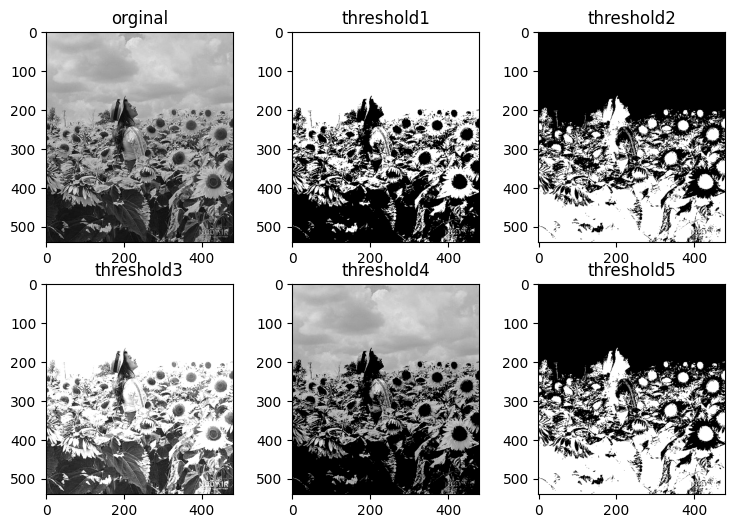

In [4]:
# cv2.threshold(src(input image), thresh, maxval, type[, dst](which kind of threshold? we have 5 way))   it's global    ,   threshold meaning in grayscale img not color img

img = cv.imread(r'D:/test.computer_vision/l2/img/sun2.jpg', 0)

ret1, new_img1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# print(ret)

ret2, new_img2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)

ret3, new_img3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)

ret4, new_img4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)

ret5, new_img5 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=[9,6])
plt.subplot(231); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(232); plt.imshow(new_img1, cmap='gray'); plt.title('threshold1')
plt.subplot(233); plt.imshow(new_img2, cmap='gray'); plt.title('threshold2')
plt.subplot(234); plt.imshow(new_img3, cmap='gray'); plt.title('threshold3')
plt.subplot(235); plt.imshow(new_img4, cmap='gray'); plt.title('threshold4')
plt.subplot(236); plt.imshow(new_img5, cmap='gray'); plt.title('threshold5')

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


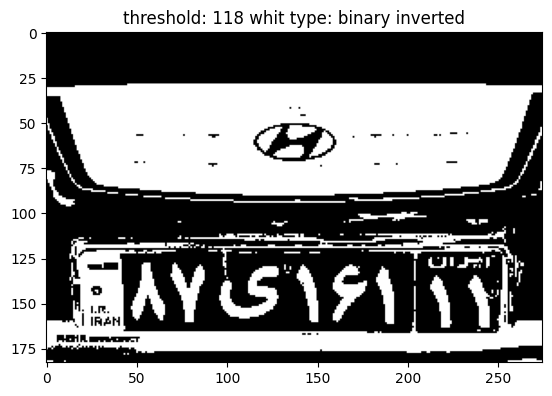

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

max_value = 255
max_type = 4
max_binary_value = 255
tracbar_type = 'Type: \n 0: Binary \n 1: Binary Inverted \n 2: Truncate \n 3: To Zero \n 4: To Zero Inverted'
tracbar_value = 'value'
window_name = 'thereshold demo'

def threshold_demo(val):
    global dst, threshold_value, threshold_type
    threshold_type = cv.getTrackbarPos(tracbar_type, window_name)
    threshold_value = cv.getTrackbarPos(tracbar_value, window_name)
    _, dst = cv.threshold(src_gray, threshold_value, max_binary_value, threshold_type)
    cv.imshow(window_name, dst)

src = cv.imread(r'D:/test.computer_vision/l2/img/pelak.jpg')
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow(window_name, cv.WINDOW_NORMAL)
cv.resizeWindow(window_name, 400, 300)
cv.createTrackbar(tracbar_type, window_name, 3, max_type, threshold_demo)
cv.createTrackbar(tracbar_value, window_name, 0, max_value, threshold_demo)

threshold_demo(0)

cv.waitKey()
cv.destroyAllWindows()

thresh_type = ['binary','binary inverted','truncate','to zero','to zero inverted']
plt.imshow(dst, cmap='gray'); plt.title('threshold: {} whit type: {}'.format(threshold_value, thresh_type[threshold_type]))
plt.show()

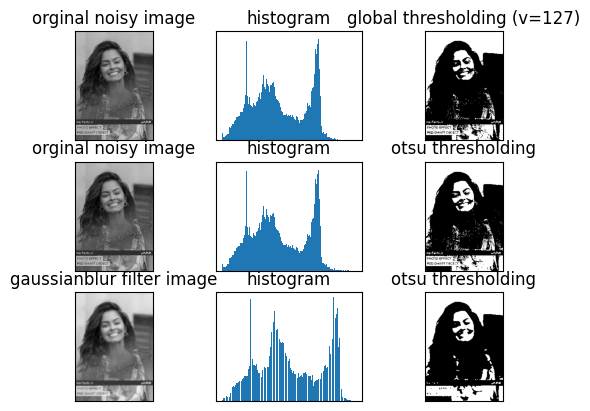

In [ ]:
img = cv.imread(r'D:/test.computer_vision/l2/img/noise.jpg', 0)     # otsu just working in single chanel then you shoud write 0 for changing color mood to grayscale

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)       # global thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)       # otsu's thresholding
blur = cv.GaussianBlur(img, (5,5), 0)           # gaussianblur filter for deleting salt and peaper noise
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)       # otsu's thresholding after gaussianblur filter

imges = [img, 0, th1,
         img, 0, th2,
         blur, 0, th3]
titles = ['orginal noisy image', 'histogram', 'global thresholding (v=127)',
          'orginal noisy image', 'histogram', 'otsu thresholding',
          'gaussianblur filter image', 'histogram', 'otsu thresholding']

plt.Figure(figsize=[15,7])
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(imges[i*3], 'gray'), plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2), plt.hist(imges[i*3].ravel(),256), plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3), plt.imshow(imges[i*3+2], 'gray'), plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

Text(0.5, 1.0, 'adaptive gaussian + noise removal')

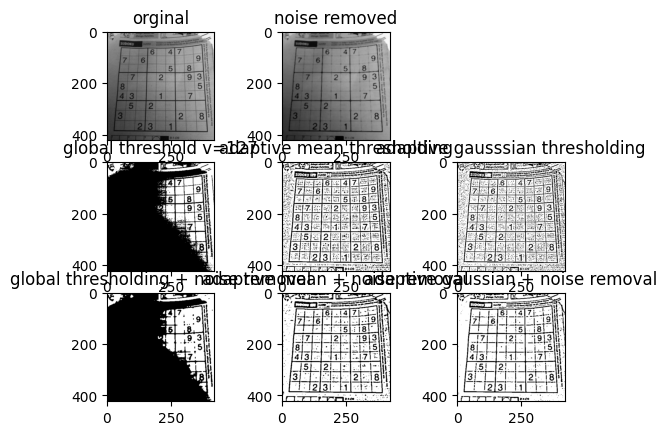

In [12]:
# cv.adaptivethreshold(src, max value, adaptive method, threshold type, block size(how many of neiberhood we have), c(Subtract from all values))

orginal_img = cv.imread(r'D:/test.computer_vision/l2/img/sudoku.jpg', 0) 
noise_removal_img = cv.medianBlur(orginal_img, 5)   # == cv.GaussianBlur(orginal_img, (5,5), 0) 

_,output1 = cv.threshold(orginal_img, 127, 255, cv.THRESH_BINARY)
output2 = cv.adaptiveThreshold(orginal_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
output3 = cv.adaptiveThreshold(orginal_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

_,output4 = cv.threshold(noise_removal_img, 127, 255, cv.THRESH_BINARY)
output5 = cv.adaptiveThreshold(noise_removal_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
output6 = cv.adaptiveThreshold(noise_removal_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

plt.Figure(figsize=[15,15])
plt.subplot(331); plt.imshow(orginal_img, cmap='gray'); plt.title('orginal')
plt.subplot(332); plt.imshow(noise_removal_img, cmap='gray'); plt.title('noise removed')
plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title('global threshold v=127')
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title('adaptive mean thresholding')
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title('adaptive gausssian thresholding')
plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title('global thresholding + noise removal')
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title('adaptive mean + noise removal')
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title('adaptive gaussian + noise removal')


Text(0.5, 1.0, 'closing')

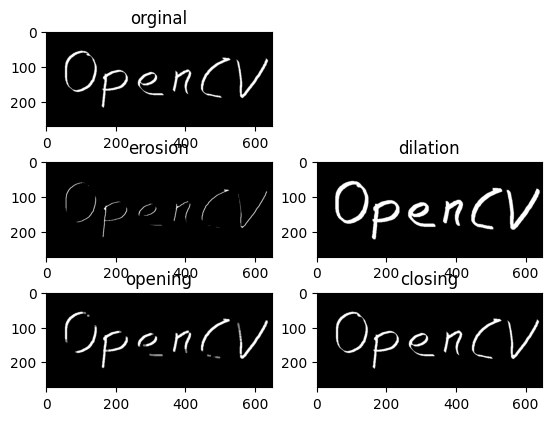

In [ ]:
# morphology just for binary pic -> dilation = expands (* , or) ,   erosion = shrinke (* , and),    opening = erosion next dilation,    closing = dilation next erosion    ,dont useful reped in opening & closing,     data is a withe part
import numpy as np

img = cv.imread(r'D:/test.computer_vision/l2/img/opencv_inv.png', 0) 
kernel = np.ones((5,5), np.uint8)                                                   # kernel == structure element

erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.Figure(figsize=[10,8])
plt.subplot(321); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(323); plt.imshow(erosion, cmap='gray'); plt.title('erosion')
plt.subplot(324); plt.imshow(dilation, cmap='gray'); plt.title('dilation')
plt.subplot(325); plt.imshow(opening, cmap='gray'); plt.title('opening')
plt.subplot(326); plt.imshow(closing, cmap='gray'); plt.title('closing')

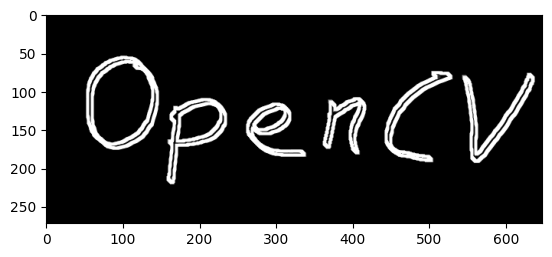

In [16]:
subtracted = cv.subtract(dilation, erosion)     # dilation result - erosion result
plt.imshow(subtracted, cmap='gray')

In [18]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5,5), (2,2))
kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

Text(0.5, 1.0, 'closing')

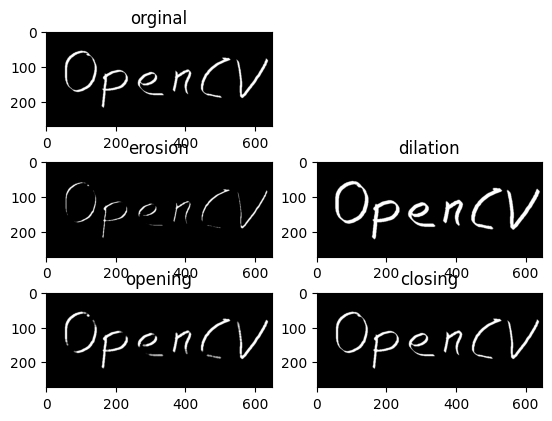

In [19]:
# morphology just for binary pic -> dilation = expands (* , or) ,   erosion = shrinke (* , and),    opening = erosion next dilation,    closing = dilation next erosion    ,dont useful reped in opening & closing,     data is a withe part
import numpy as np

img = cv.imread(r'D:/test.computer_vision/l2/img/opencv_inv.png', 0) 
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5,5), (2,2))     # (5,5) == kernel_size      (2,2) == origin = the center point

erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.Figure(figsize=[10,8])
plt.subplot(321); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(323); plt.imshow(erosion, cmap='gray'); plt.title('erosion')
plt.subplot(324); plt.imshow(dilation, cmap='gray'); plt.title('dilation')
plt.subplot(325); plt.imshow(opening, cmap='gray'); plt.title('opening')
plt.subplot(326); plt.imshow(closing, cmap='gray'); plt.title('closing')

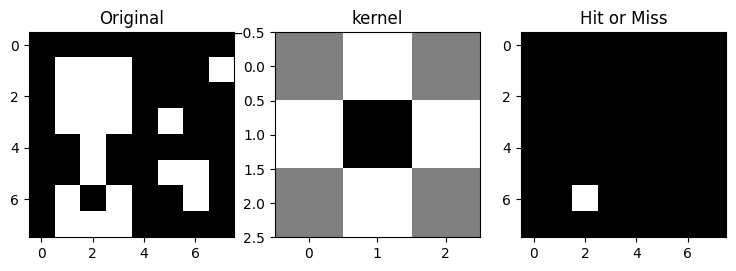

In [20]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)       #  in HITMISS method -1=should be empty or 0    1=should fill or 1      0=dont care

# only for visualization        # just for see 0,1
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)

plt.figure(figsize=[9,5])
plt.subplot(131);plt.imshow(input_image, cmap='gray');plt.title("Original");
plt.subplot(132);plt.imshow(kernel, cmap='gray');plt.title("kernel");
plt.subplot(133);plt.imshow(output_image, cmap='gray');plt.title("Hit or Miss");

Text(0.5, 1.0, 'binary img')

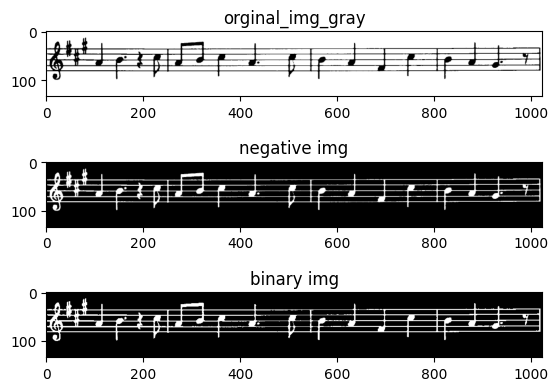

In [22]:
img = cv.imshowimg = cv.imread(r'D:/test.computer_vision/l2/img/notes.png', 0) 
negative_img = cv.bitwise_not(img)          # change white backgrand to balck and black pen to white because morphology function effect on white
binary_img = cv.adaptiveThreshold(negative_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)

plt.Figure(figsize=[17,6])
plt.subplot(311); plt.imshow(img, cmap='gray'); plt.title('orginal_img_gray')
plt.subplot(312); plt.imshow(negative_img, cmap='gray'); plt.title('negative img')
plt.subplot(313); plt.imshow(binary_img, cmap='gray'); plt.title('binary img')

In [23]:
cols = binary_img.shape[1]
horizental_size = cols // 30
horizentalstructure = cv.getStructuringElement(cv.MORPH_RECT, (horizental_size, 1))
print(horizentalstructure)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Text(0.5, 1.0, 'horizental_line_img')

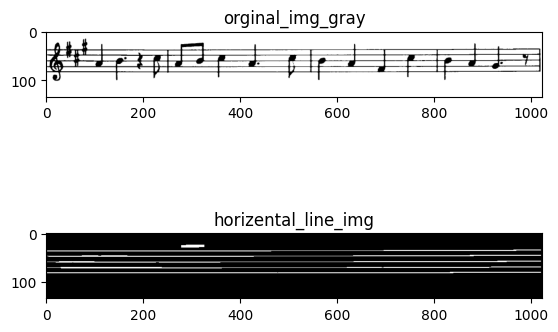

In [24]:
horizental = cv.morphologyEx(binary_img, cv.MORPH_OPEN, horizentalstructure)

plt.Figure(figsize=[17,6])
plt.subplot(211), plt.imshow(img, cmap='gray'); plt.title('orginal_img_gray')
plt.subplot(212), plt.imshow(horizental, cmap='gray'); plt.title('horizental_line_img')

In [25]:
# Specify size on vertical axis
rows = img.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
print(verticalStructure)

[[1]
 [1]
 [1]
 [1]]


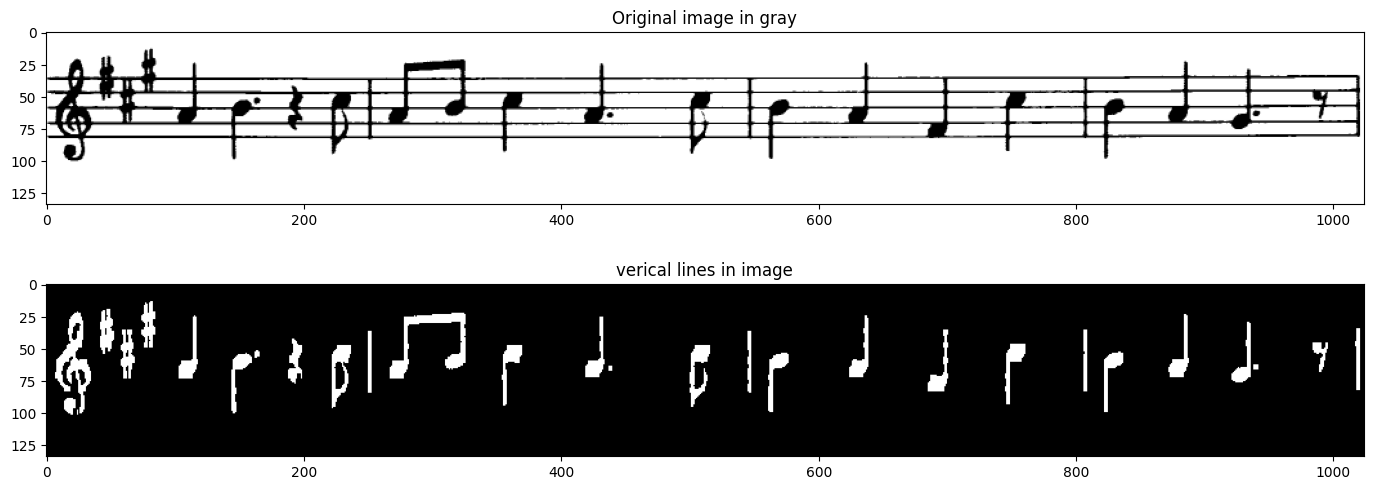

In [26]:
# Apply morphology operations
vertical = cv.morphologyEx(binary_img, cv.MORPH_OPEN, verticalStructure)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(img, cmap='gray');plt.title("Original image in gray");
plt.subplot(212);plt.imshow(vertical, cmap='gray');plt.title("verical lines in image");

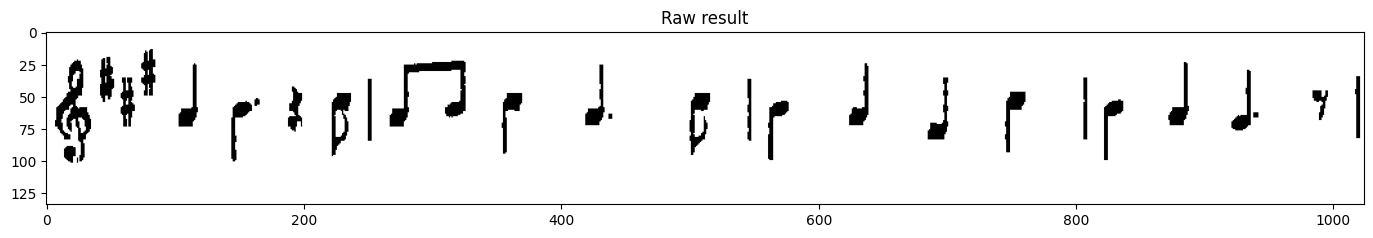

In [27]:
# Inverse vertical image
raw_result = cv.bitwise_not(vertical)

plt.figure(figsize=[17,6])
plt.imshow(raw_result, cmap='gray');plt.title("Raw result");

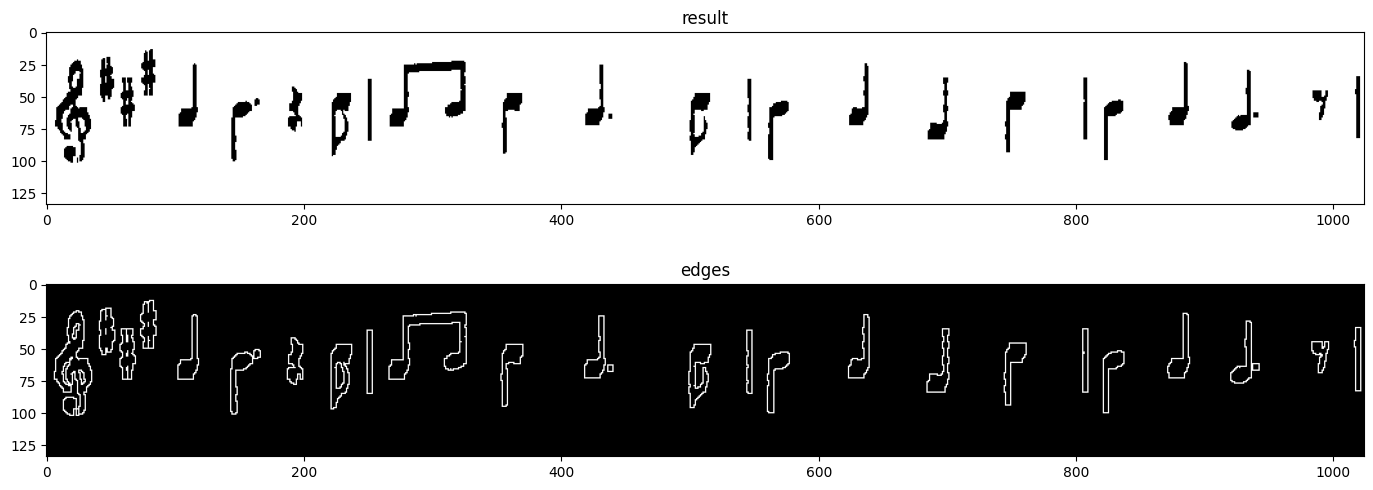

In [28]:
edges = cv.adaptiveThreshold(raw_result, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(raw_result, cmap='gray');plt.title("result");
plt.subplot(212);plt.imshow(edges, cmap='gray');plt.title("edges");

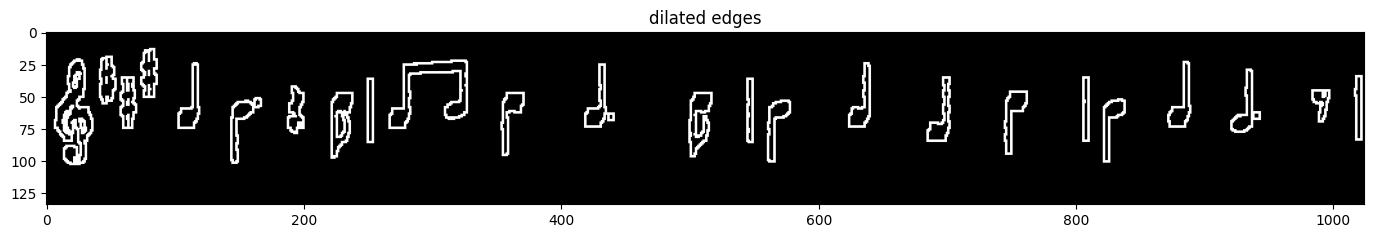

In [29]:
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)

plt.figure(figsize=[17,6])
plt.imshow(edges, cmap='gray');plt.title("dilated edges");

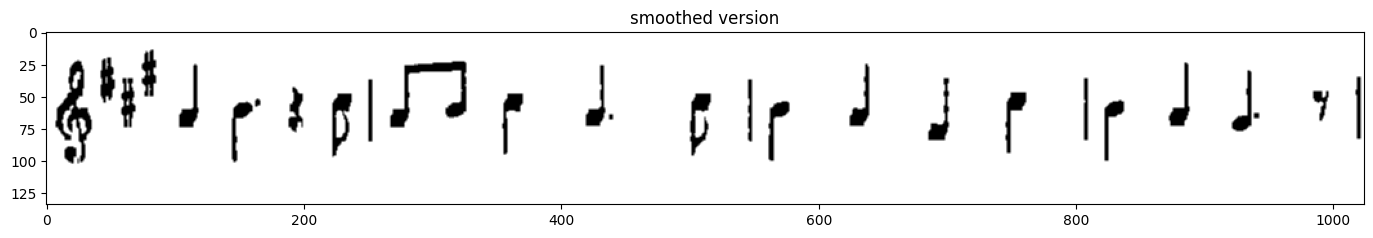

In [30]:
smooth = cv.blur(raw_result, (2, 2))
plt.figure(figsize=[17,6])
plt.imshow(smooth, cmap='gray');plt.title("smoothed version");

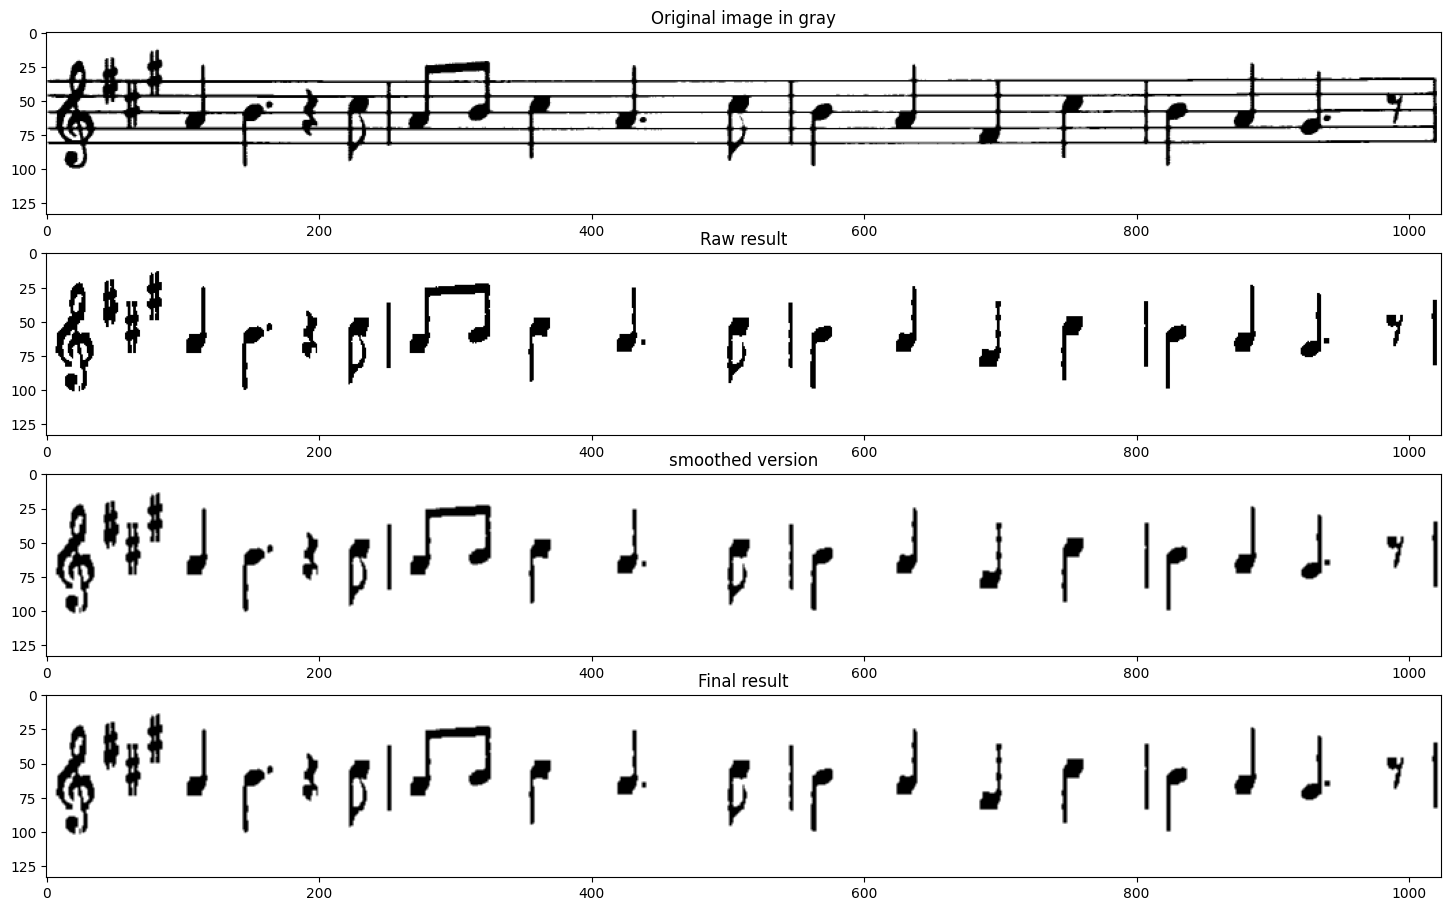

In [31]:
(rows, cols) = np.where(edges != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows, cols]
plt.figure(figsize=[18,11])
plt.subplot(411);plt.imshow(img, cmap='gray');plt.title("Original image in gray");
plt.subplot(412);plt.imshow(raw_result, cmap='gray');plt.title("Raw result");
plt.subplot(413);plt.imshow(smooth, cmap='gray');plt.title("smoothed version");
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title("Final result");

Text(0.5, 1.0, 'labeled img')

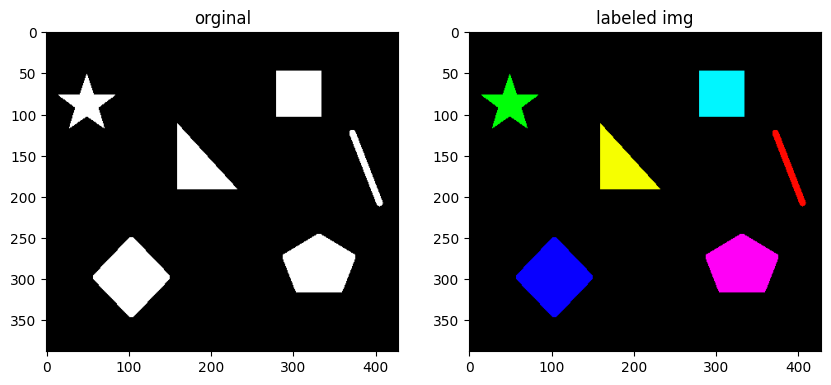

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'D:/test.computer_vision/l2/img/shapes.png', 0) 
_, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)          # convert to binary img whit thresholding
num_labels, labels = cv.connectedComponents(img)

# create hue rang for coloring, hsv mood
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img)*255
labeled_img = cv.merge([label_hue, blank, blank])

labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

# for be sure to set backgrand lebal to black
labeled_img[label_hue==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(122); plt.imshow(labeled_img, cmap='gray'); plt.title('labeled img')

Text(0.5, 1.0, 'labeled img 8')

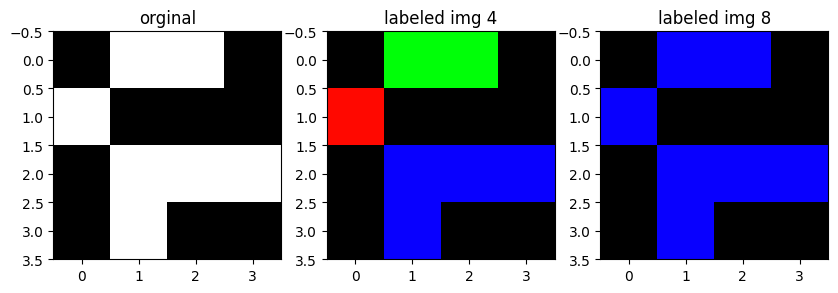

In [2]:
img = cv.imread(r'D:/test.computer_vision/l2/img/small-connected-test.png', 0) 
_, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, label_4_connectivity = cv.connectedComponents(img, connectivity=4)
_, label_8_connectivity = cv.connectedComponents(img, connectivity=8)

label_hue_4 = np.uint8(179*label_4_connectivity/np.max(label_4_connectivity))
label_hue_8 = np.uint8(179*label_8_connectivity/np.max(label_8_connectivity))

blank = np.ones_like(img)*255
labeled_img_4 = cv.merge([label_hue_4, blank, blank])
labeled_img_8 = cv.merge([label_hue_8, blank, blank])

labeled_img_4 = cv.cvtColor(labeled_img_4, cv.COLOR_HSV2BGR)
labeled_img_8 = cv.cvtColor(labeled_img_8, cv.COLOR_HSV2BGR)

labeled_img_4[label_hue_4==0] = 0
labeled_img_8[label_hue_8==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('orginal')
plt.subplot(132); plt.imshow(labeled_img_4, cmap='gray'); plt.title('labeled img 4')
plt.subplot(133); plt.imshow(labeled_img_8, cmap='gray'); plt.title('labeled img 8')

In [ ]:
label_4_connectivity    # در چهار همسایگی فقط شمال جنوب شرق و غرب مورد برسی قرار میگیرند و اگر اتصالی بین انها نباشد هر کدام شکل جدایی خواهند بود

array([[0, 1, 1, 0],
       [2, 0, 0, 0],
       [0, 3, 3, 3],
       [0, 3, 0, 0]], dtype=int32)

In [ ]:
label_8_connectivity # در هشت همسایگی علاوه بر چهار جهت اصلی چهار جهت فرعی هم مورد بررسی قرار می گیرند و اگر اتصالی بین انها وجود داشت یک شکل در نظر گرفته میشوند

array([[0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0]], dtype=int32)

In [ ]:
img = cv.imread(r'D:/test.computer_vision/l2/img/shapes.png', 0)
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    print(contour.shape)                # 24 point for draw one shape

(24, 1, 2)
(134, 1, 2)
(146, 1, 2)
(17, 1, 2)
(117, 1, 2)
(4, 1, 2)


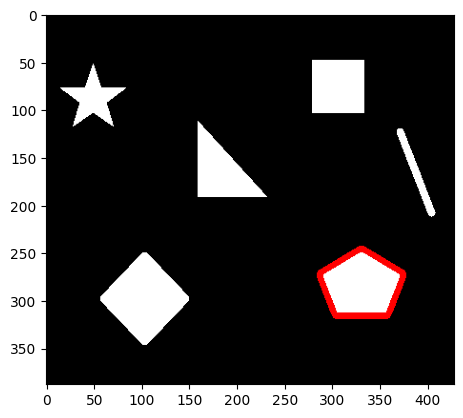

In [8]:
bgr_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.polylines(bgr_img, [contours[1]], True, (0,0,255), 5)
plt.imshow(bgr_img[...,::-1])

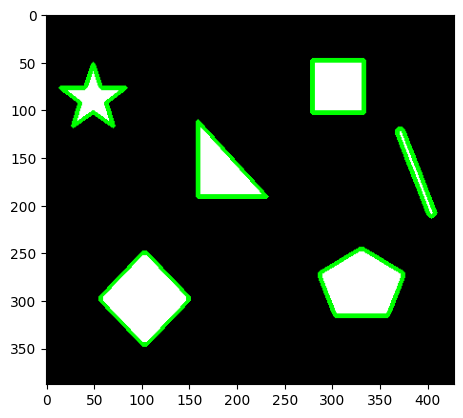

In [9]:
img = cv.imread(r'D:/test.computer_vision/l2/img/shapes.png', 0)
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

bgr_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

all_contours = cv.drawContours(bgr_img, contours, -1, (0,255,0), 3)         # -1 == all of contours, you can write number of contour ex: 3
plt.imshow(all_contours)

cv.CHAIN_APPROX_NONE:
contours[0].shape: (1040, 1, 2) so number of points for the contour: 1040
-----


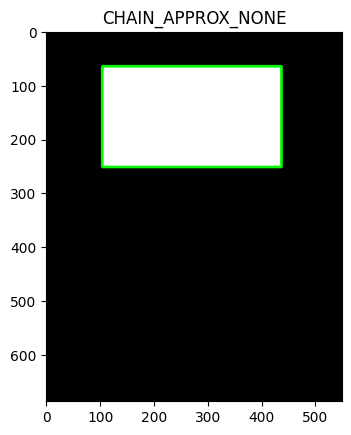

In [12]:
img = cv.imread(r'D:/test.computer_vision/l2/img/paint.png', 0)
ert, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)


print('cv.CHAIN_APPROX_NONE:')
print('contours[0].shape: {} so number of points for the contour: {}'.format(contours[0].shape, len(contours[0])))

bgr_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

for point in contours[0]:
    cv.circle(bgr_img, (point[0][0], point[0][1]), 2, (0,255,0), -1)

plt.imshow(bgr_img[...,::-1]); plt.title('CHAIN_APPROX_NONE')
print('-'*5)

cv.CHAIN_APPROX_SIMPLE:
contours[0].shape: (4, 1, 2) so number of points for the contour: 4
-----


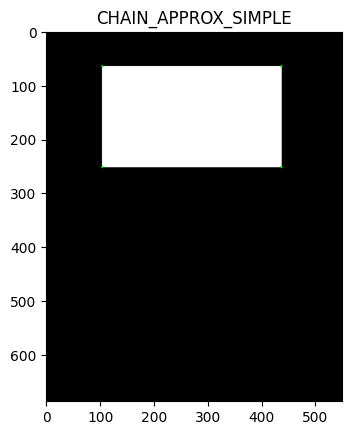

In [13]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print('cv.CHAIN_APPROX_SIMPLE:')
print('contours[0].shape: {} so number of points for the contour: {}'.format(contours[0].shape, len(contours[0])))

bgr_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

for point in contours[0]:
    cv.circle(bgr_img, (point[0][0], point[0][1]), 2, (0,255,0), -1)

plt.imshow(bgr_img[...,::-1]); plt.title('CHAIN_APPROX_SIMPLE')
print('-'*5)


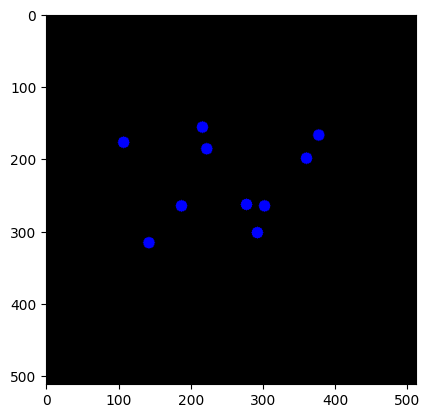

In [25]:
import random

random_point = np.random.randint(100, 400, 20)
random_point = random_point.reshape(10, 2)

img = np.zeros((512,512,3), np.uint8)

for p in random_point:
    cv.circle(img, (p[0], p[1]), 8, (255,0,0), -1)

plt.imshow(img[...,::-1])

In [26]:
hull = cv.convexHull(random_point)
hull.shape

(6, 1, 2)

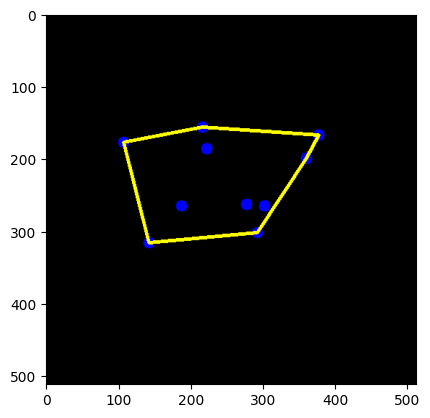

In [27]:
cv.drawContours(img, [hull], -1, (0,255,255), 4)
plt.imshow(img[...,::-1])

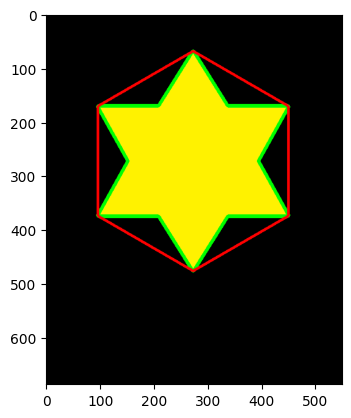

In [37]:
img = cv.imread(r'D:/test.computer_vision/l2/img/star_paint.png')
src_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(src_gray, 127, 255, 0)

contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

hull_list = []

for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)

cv.drawContours(img, contours, -1, (0,255,0), 5)
cv.drawContours(img, hull_list, -1, (0,0,255), 3)

plt.imshow(img[...,::-1])

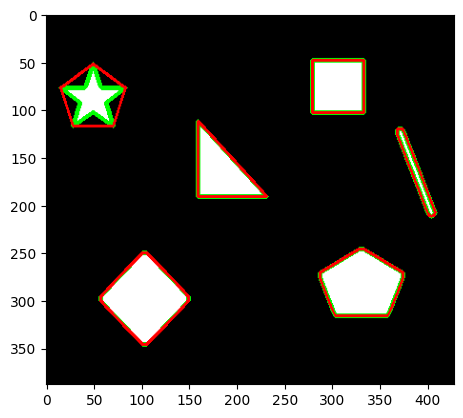

In [41]:
img = cv.imread(r'D:/test.computer_vision/l2/img/shapes.png')
src_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(src_gray, 127, 255, 0)

contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

hull_list = []

for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)

cv.drawContours(img, contours, -1, (0,255,0), 4)
cv.drawContours(img, hull_list, -1, (0,0,255), 2)

plt.imshow(img[...,::-1])

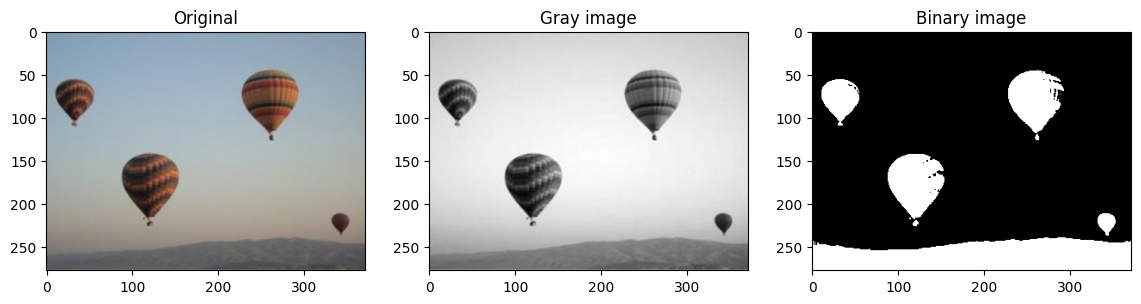

In [44]:
input_image = cv.imread(r'D:/test.computer_vision/l2/img/balloon.png')            

# convert image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

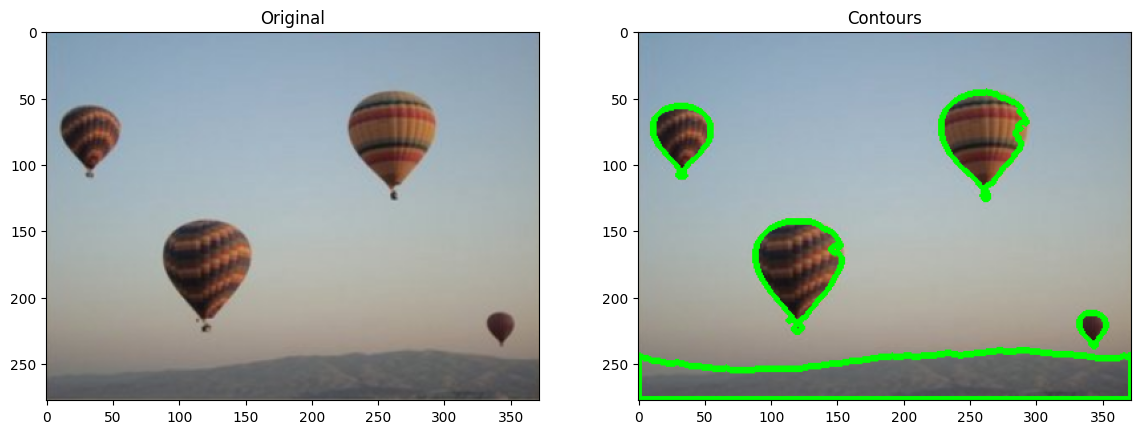

In [45]:
# Let's define our kernel size
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
all_contours = cv.drawContours(input_image.copy(), contours, -1, (0,255,0), 3)
plt.figure(figsize=[14,8])

plt.subplot(121);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(all_contours[...,::-1]);plt.title("Contours");


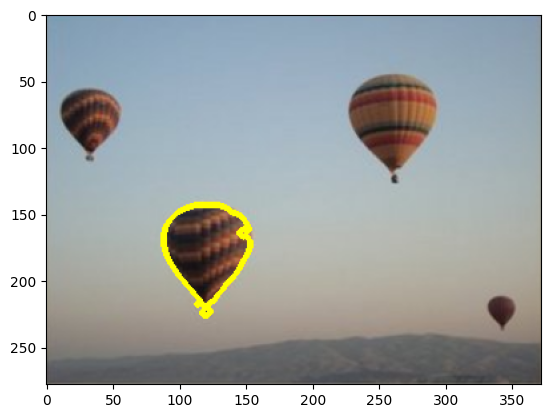

In [46]:
drawing = input_image.copy()
cv.drawContours(drawing, [contours[2]], -1, (0,255,255),3)
plt.imshow(drawing[...,::-1])

In [47]:
boundRect = cv.boundingRect(contours[2])
centers, radius = cv.minEnclosingCircle(contours[2])

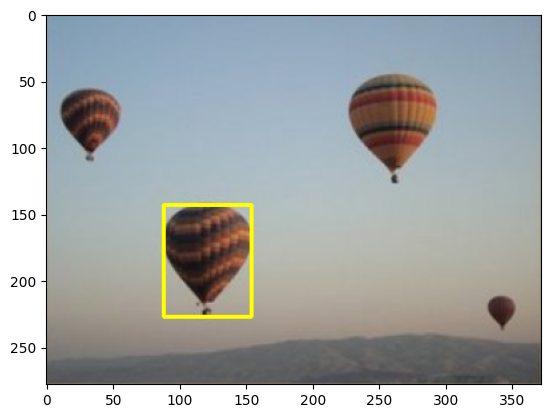

In [48]:
drawing = input_image.copy()

cv.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)
plt.imshow(drawing[...,::-1])

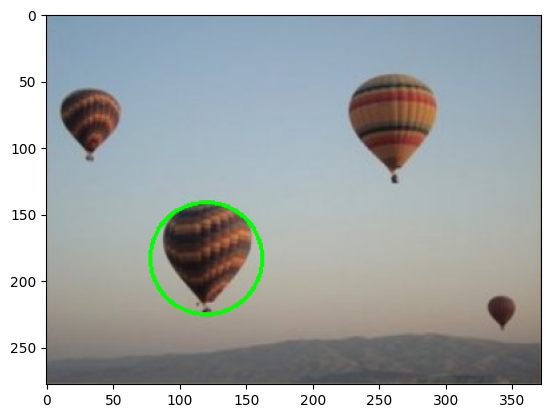

In [49]:
drawing = input_image.copy()
cv.circle(drawing, (int(centers[0]), int(centers[1])), int(radius), (0,255,), 2)
plt.imshow(drawing[...,::-1])

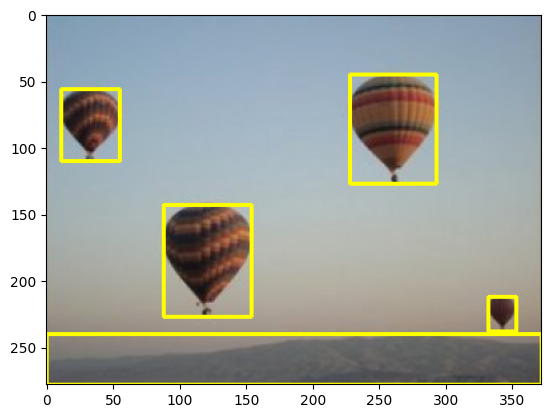

In [51]:
input_image = cv.imread(r'D:/test.computer_vision/l2/img/balloon.png')            
           
# convert image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)

# Let's define our kernel size
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

drawing = input_image.copy()

for c in contours:
    boundRect = cv.boundingRect(c)
    cv.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)

plt.imshow(drawing[...,::-1])

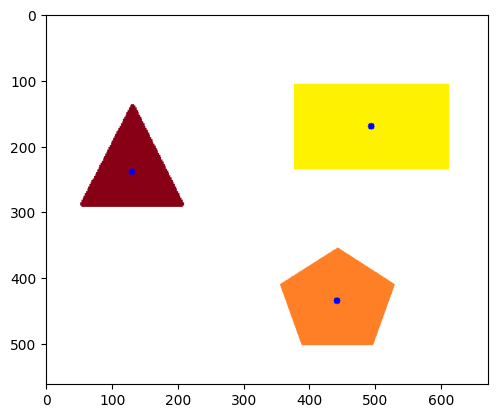

In [ ]:
image = cv.imread(r'D:/test.computer_vision/l2/img/shapes2.png')            

# Grayscale our image
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for c in contours:
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(image, (cx, cy), 5, (255,0,0), -1)

plt.imshow(image[...,::-1])

Sorted contor Areas
[30315.0, 17775.0, 12794.5]


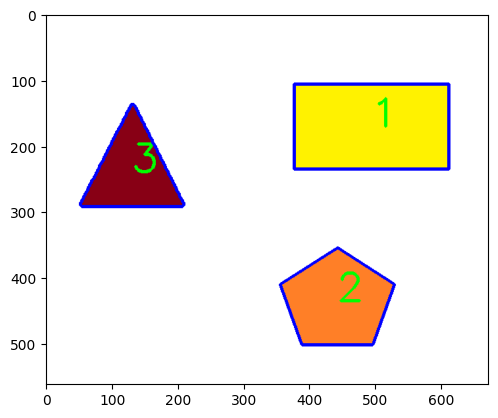

In [57]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        all_areas.append(area)
    return all_areas


# Load our image
image = cv.imread(r'D:/test.computer_vision/l2/img/shapes2.png')            

# Grayscale our image
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)

# Find contours and print how many were found
contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv.drawContours(image, [c], -1, (255,0,0), 3)

plt.imshow(image[...,::-1])

Sorted contor Areas
[11060.0, 3408.5, 3133.5, 1491.5, 337.5]


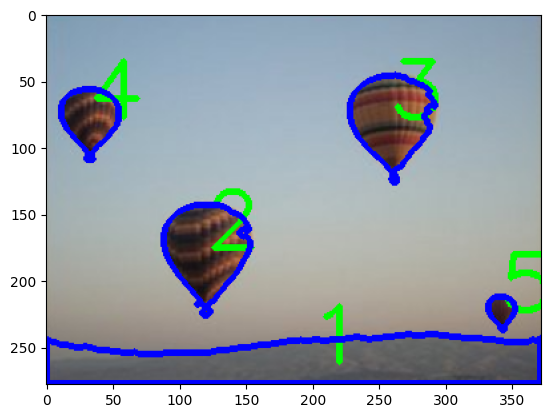

In [58]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
input_image = cv.imread(r'D:/test.computer_vision/l2/img/balloon.png')            

# convert image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)


# Let's define our kernel size
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

# Find contours and print how many were found
contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(input_image, str(i+1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv.drawContours(input_image, [c], -1, (255,0,0), 3)

plt.imshow(input_image[...,::-1])

In [59]:
# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv.contourArea(contours) > 10:
        M = cv.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

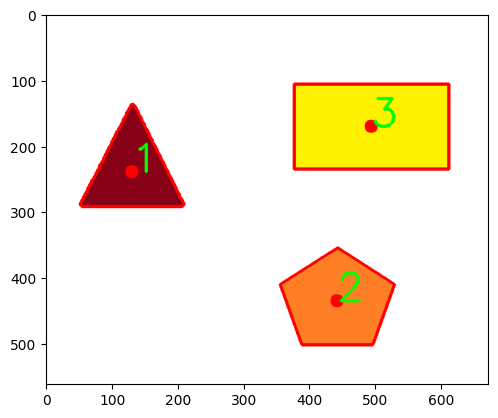

In [60]:
# Load our image
image = cv.imread(r'D:/test.computer_vision/l2/img/shapes2.png')            

# Grayscale our image
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)

# Find contours and print how many were found
contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
    
#Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv.drawContours(image, [c], -1, (0,0,255), 3)  
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

plt.imshow(image[...,::-1])

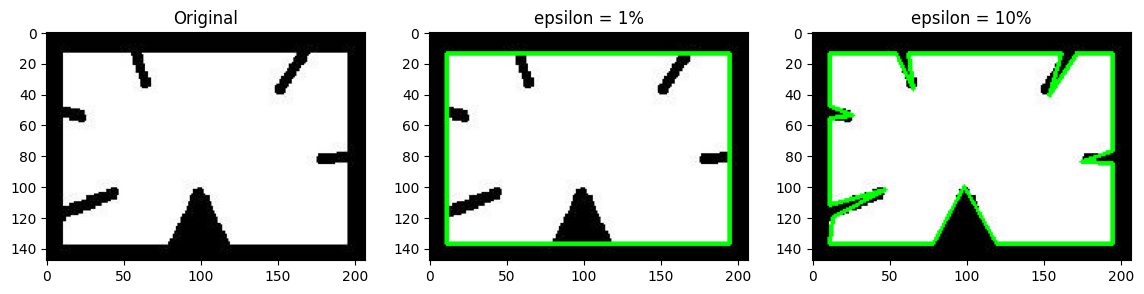

In [64]:
image = cv.imread(r'D:/test.computer_vision/l2/img/approx.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

ret,thresh = cv.threshold(gray,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)

#1st contour
cnt = contours[0]
perimeter = cv.arcLength(cnt,True)

first_output = image.copy()
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
cv.drawContours(first_output, [approx], 0, (0,255,0), 2)

second_output = image.copy()
epsilon = 0.01*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
cv.drawContours(second_output, [approx], 0, (0,255,0), 2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(first_output[...,::-1]);plt.title("epsilon = 1%");
plt.subplot(133);plt.imshow(second_output[...,::-1]);plt.title("epsilon = 10%");

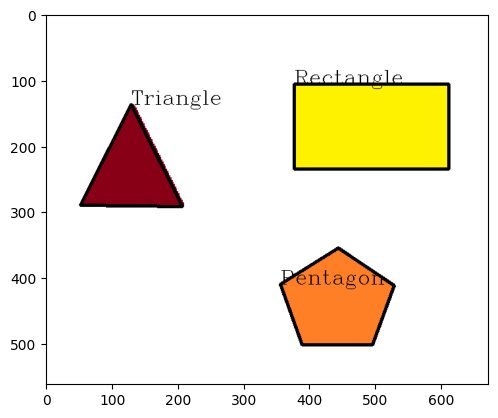

In [65]:
image = cv.imread(r'D:/test.computer_vision/l2/img/shapes2.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)
imagecontours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv.arcLength(c, True)
    approximations = cv.approxPolyDP(c, epsilon, True)
    cv.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv.putText(image, "Triangle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv.putText(image, "Rectangle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv.putText(image, "Pentagon", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv.putText(image, "Ellipse", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv.putText(image, "Circle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

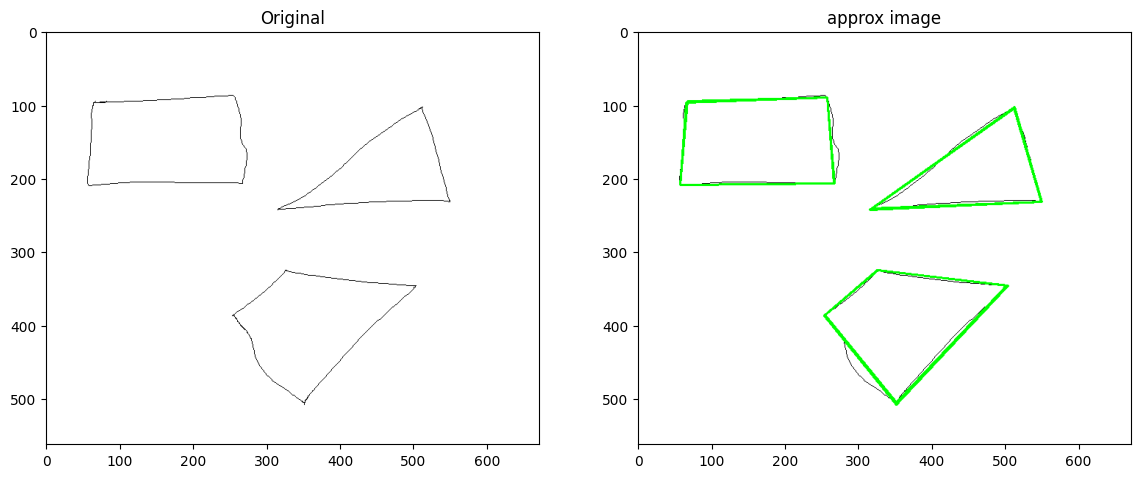

In [66]:
# Load image and keep a copy
image = cv.imread(r'D:/test.computer_vision/l2/img/sketch.png')
 
# Grayscale and binarize
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv.findContours(thresh.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
copy = image.copy()


# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, accuracy, True)
    cv.drawContours(copy, [approx], 0, (0, 255, 0), 2)

plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(copy, cmap='gray');plt.title("approx image");

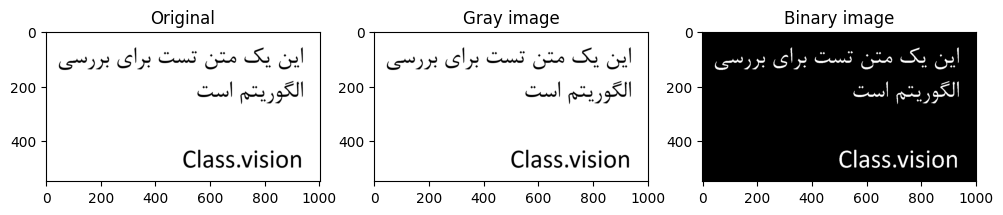

In [68]:
input_image = cv.imread(r'D:/test.computer_vision/l2/img/matn.png')

# convert image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)


plt.figure(figsize=[12,8])
plt.subplot(131);plt.imshow(input_image, cmap='gray');plt.title("Original");

plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

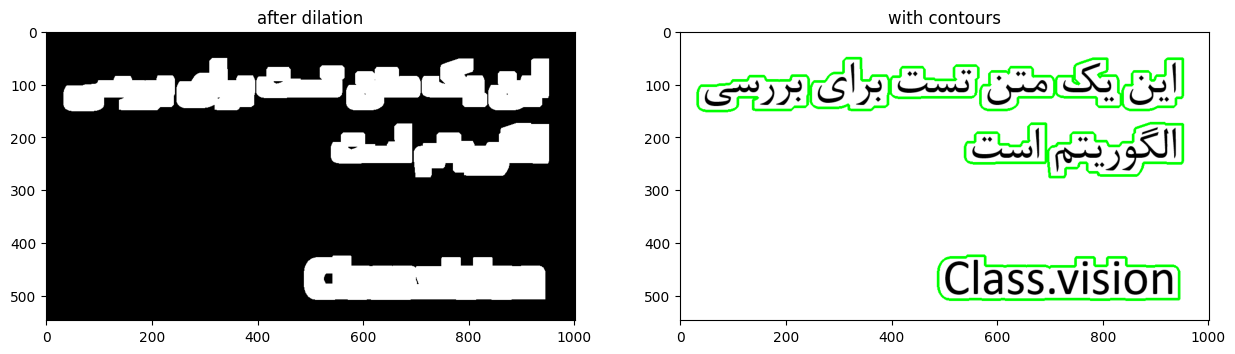

In [69]:
# dilation
kernel = cv.getStructuringElement(cv.MORPH_RECT,(15,10))

dilation = cv.dilate(binary_image, kernel, iterations = 2)

outputImage = input_image.copy()

contours, hierarchy = cv.findContours(dilation,        
                                             cv.RETR_EXTERNAL,                 
                                             cv.CHAIN_APPROX_SIMPLE)

all_contours = cv.drawContours(input_image, contours, -1, (0,255,0), 3)

plt.figure(figsize=[15,8])
plt.subplot(121);plt.imshow(dilation, cmap='gray');plt.title("after dilation");
plt.subplot(122);plt.imshow(all_contours, cmap='gray');plt.title("with contours");

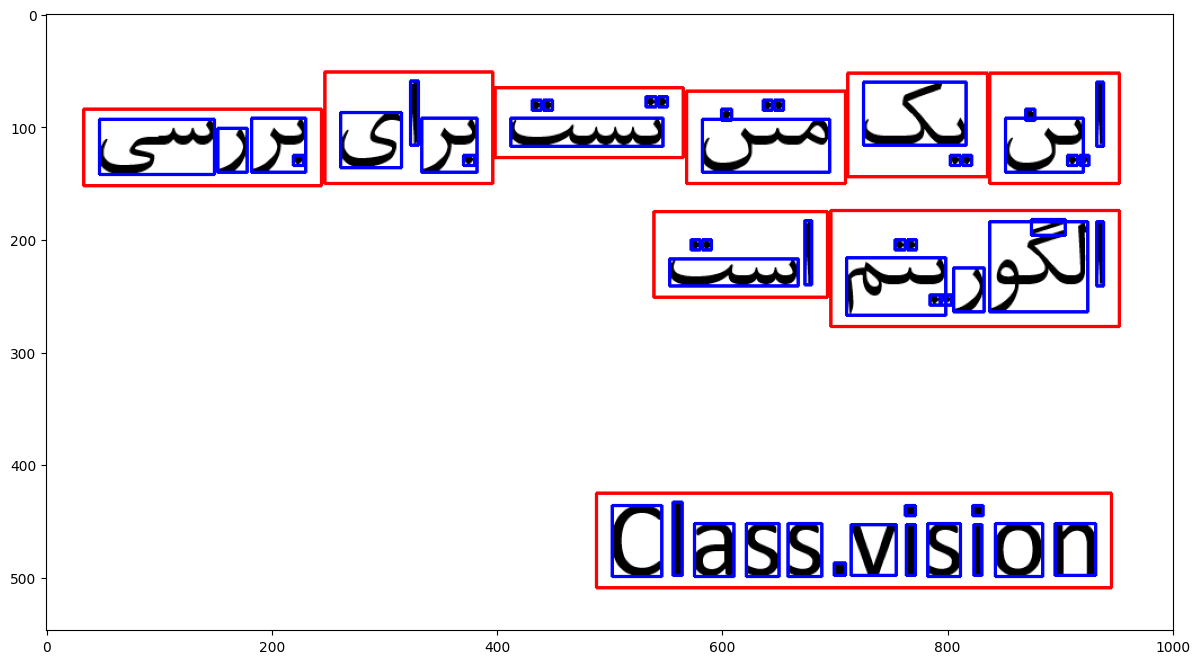

In [70]:
MIN_CONTOUR_AREA = 5

for contour in contours:                         
    if cv.contourArea(contour) > MIN_CONTOUR_AREA:          

        [intX, intY, intW, intH] = cv.boundingRect(contour)         

        cv.rectangle(outputImage,(intX, intY), (intX+intW,intY+intH), (0, 0, 255), 2)                            

        # Get subimage of word and find contours of that word
        imgROI = binary_image[intY:intY+intH, intX:intX+intW]   


        subContours, subHierarchy = cv.findContours(imgROI.copy(),        
                                             cv.RETR_EXTERNAL,                 
                                             cv.CHAIN_APPROX_SIMPLE) 

        # This part is not working as I am expecting
        for subContour in subContours:

            [pointX, pointY, width, height] = cv.boundingRect(subContour) 


            cv.rectangle(outputImage,(intX+pointX, intY+pointY),(intX+pointX+width, intY+pointY+height), (255, 0, 0),2)

plt.figure(figsize=[15,8])
plt.imshow(outputImage[...,::-1])

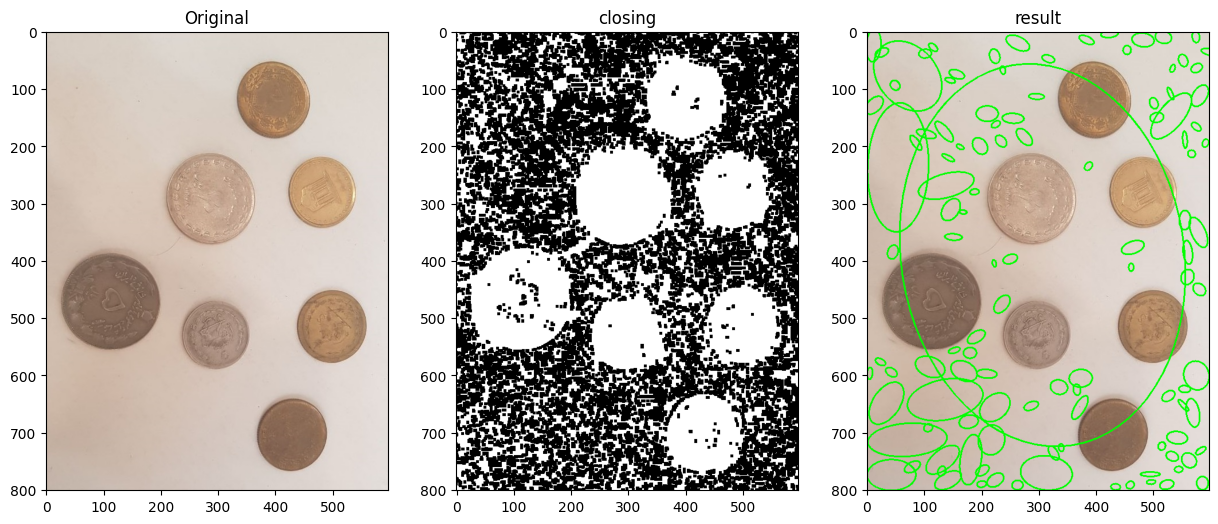

In [74]:
# Read image
image = cv.imread(r'D:/test.computer_vision/l2/img/old-iranian-coins.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 5: #There should be at least 5 points to fit the ellipse in function 'fitEllipse'
        continue
    if cv.contourArea(cnt) < 50:  # مثلاً 50 پیکسل
        continue
    ellipse = cv.fitEllipse(cnt)
    cv.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

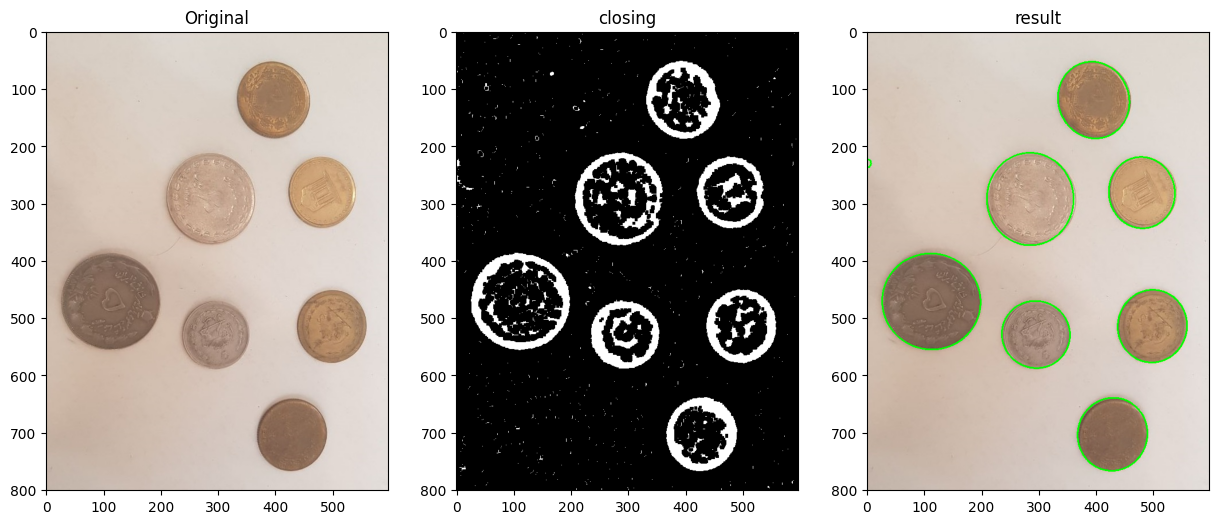

In [80]:
# Read image
image = cv.imread(r'D:/test.computer_vision/l2/img/old-iranian-coins.jpg')

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_blur = cv.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL,
                                       cv.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()

for cnt in contours:
    # area = cv.contourArea(cnt)        # محاسبه مساحت
    # if area < 5000 or area > 50000:
    #     continue
    if len(cnt) < 5: #There should be at least 5 points to fit the ellipse in function 'fitEllipse'
        continue
    if cv.contourArea(cnt) < 50:  # مثلاً 50 پیکسل
        continue
    ellipse = cv.fitEllipse(cnt)
    cv.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

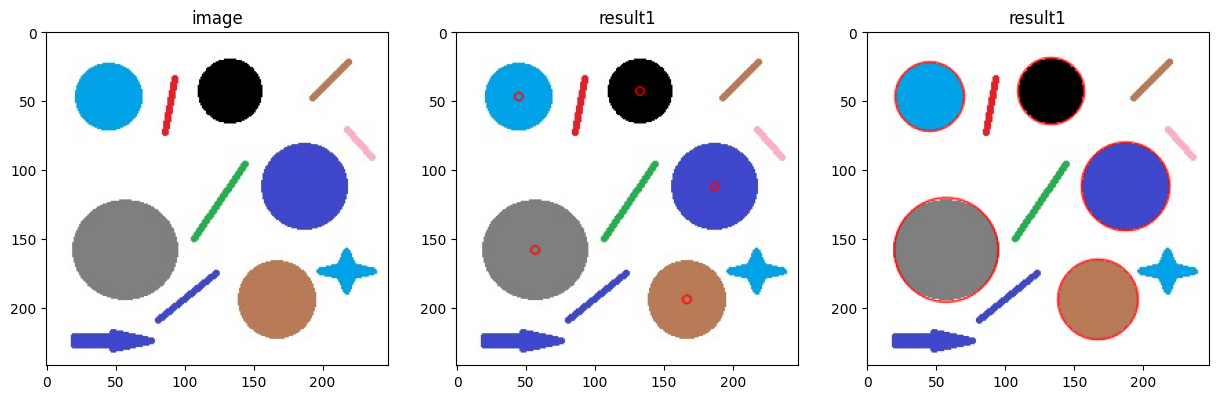

In [ ]:
# Read image
image = cv.imread(r'D:/test.computer_vision/l2/img/blob.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

detector = cv.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(image)      #تابع سطح بالاتر و خودش استانه گذاری خاکستری کردن و .. خودش انجام میده

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result1 = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255))
result2 = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(result1[...,::-1]);plt.title("result1");
plt.subplot(133);plt.imshow(result2[...,::-1]);plt.title("result1");

In [82]:
for k in keypoints:
    print("point:", k.pt)       # مرکز 
    print("point:", k.size)     # سایز

point: (133.01858520507812, 43.01858901977539)
point: 48.077266693115234
point: (187.0471649169922, 112.04715728759766)
point: 63.91517639160156
point: (57.01155471801758, 158.0416259765625)
point: 75.37721252441406
point: (45.0250244140625, 47.0250244140625)
point: 50.042076110839844
point: (167.02386474609375, 194.0207977294922)
point: 57.99103546142578


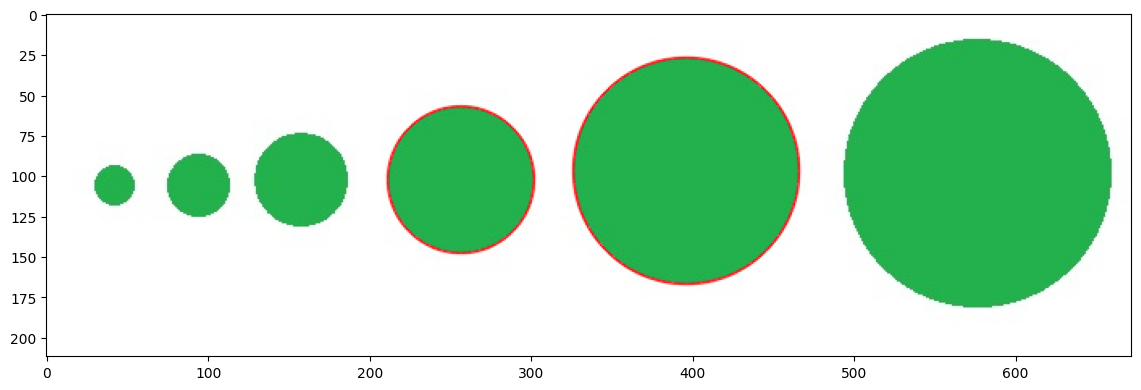

In [85]:
image = cv.imread(r'D:/test.computer_vision/l2/img/blob_size.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 5000
params.maxArea = 20000


detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[14,8])
plt.imshow(result[...,::-1])

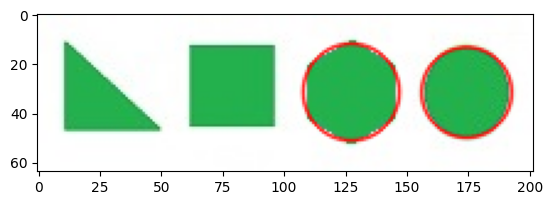

In [86]:
image = cv.imread(r'D:/test.computer_vision/l2/img/blob_circularity.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.84

detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

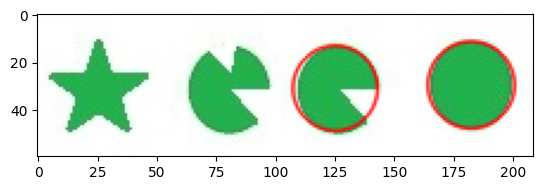

In [87]:
image = cv.imread(r'D:/test.computer_vision/l2/img/blob_convexity.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.85

detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

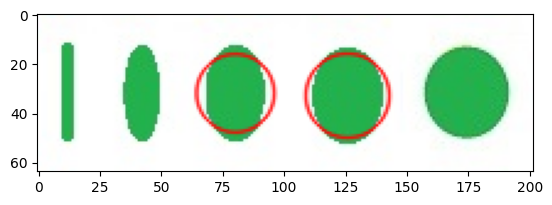

In [88]:
image = cv.imread(r'D:/test.computer_vision/l2/img/blob_inertia.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.3
params.maxInertiaRatio = 0.7

detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

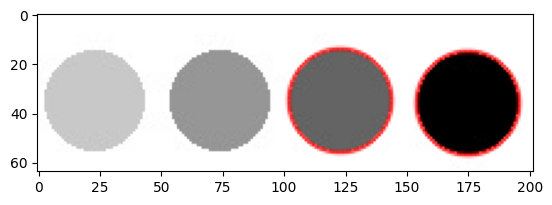

In [89]:
image = cv.imread(r'D:/test.computer_vision/l2/img/blob_Threshold.jpg')

# Setup SimpleBlobDetector parameters.
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.maxThreshold = 150

detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])